<a href="https://colab.research.google.com/github/lilrachel1985/Cancer/blob/main/cervicalclassification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# here we will import the libraries used for machine learning
import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.impute import SimpleImputer  # dealing with NaN
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn import svm, datasets # for Support Vector Machine
from sklearn.svm import SVC


## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
data = pd.read_csv("cervical_cancer2.csv")

In [5]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,0,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.Biopsy.unique()

array([0, 1])

In [7]:
data[data == '?'] = np.NaN
# Drop missing values and print shape of new DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    int64  
 2   First sexual intercourse            858 non-null    int64  
 3   Num of pregnancies                  858 non-null    int64  
 4   Smokes                              858 non-null    int64  
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    int64  
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    int64  
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [8]:
# drop columns:  "Unnamed: 32" and "ID"
# To keep the same name of file, write: inplace=True
# Separating target from features (predictor variables)

y = data.Biopsy     # target= M or B
y



0      0
1      0
2      0
3      0
4      0
      ..
853    0
854    0
855    0
856    0
857    0
Name: Biopsy, Length: 858, dtype: int64

In [9]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [10]:

data.shape

(858, 36)

In [11]:
features=data.columns[0:35]

In [12]:
data[features]


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4,15,1,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,0,1,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.00,0,...,0,0,0,1,0,1,0,0,0,0
4,46,3,21,4,0,0.0,0.0,1,15.00,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0.0,0.0,1,8.00,0,...,0,0,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0.0,0.0,1,0.08,0,...,0,0,0,0,0,0,0,0,0,1
856,33,2,24,2,0,0.0,0.0,1,0.08,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print(data.isnull().sum())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


Number of Malignant :  55
Number of Benign:  803


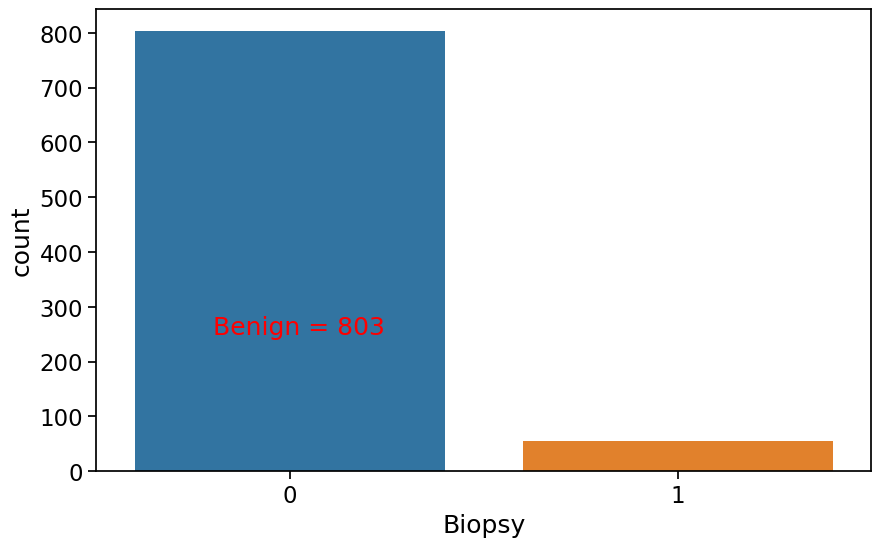

In [16]:
# The frequency of cancer stages
import seaborn as sns
B,M=data['Biopsy'].value_counts()
print('Number of Malignant : ', M)
print('Number of Benign: ', B)

plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(x="Biopsy",data=data)
plt.annotate('Benign = 803', xy=(-0.2, 250), xytext=(-0.2, 250), size=18, color='red')
plt.annotate('Malignant = 55', xy=(0.8, 250), xytext=(0.8, 250), size=18, color='w');


In [17]:
data['Biopsy'].value_counts()


0    803
1     55
Name: Biopsy, dtype: int64

In [18]:
#data0.columns or
data.keys()

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [19]:
data[features].mean()

Age                                   26.820513
Number of sexual partners              2.451049
First sexual intercourse              16.856643
Num of pregnancies                     2.127040
Smokes                                 0.143357
Smokes (years)                         1.201241
Smokes (packs/year)                    0.446278
Hormonal Contraceptives                0.560606
Hormonal Contraceptives (years)        1.972394
IUD                                    0.096737
IUD (years)                            0.444604
STDs                                   0.092075
STDs (number)                          0.155012
STDs:condylomatosis                    0.051282
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.004662
STDs:vulvo-perineal condylomatosis     0.050117
STDs:syphilis                          0.020979
STDs:pelvic inflammatory disease       0.001166
STDs:genital herpes                    0.001166
STDs:molluscum contagiosum             0

In [20]:
stdX = (data[features] - data[features].mean()) / (data[features].std())

In [21]:
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="Biopsy",
                    var_name="features",
                    value_name='value')

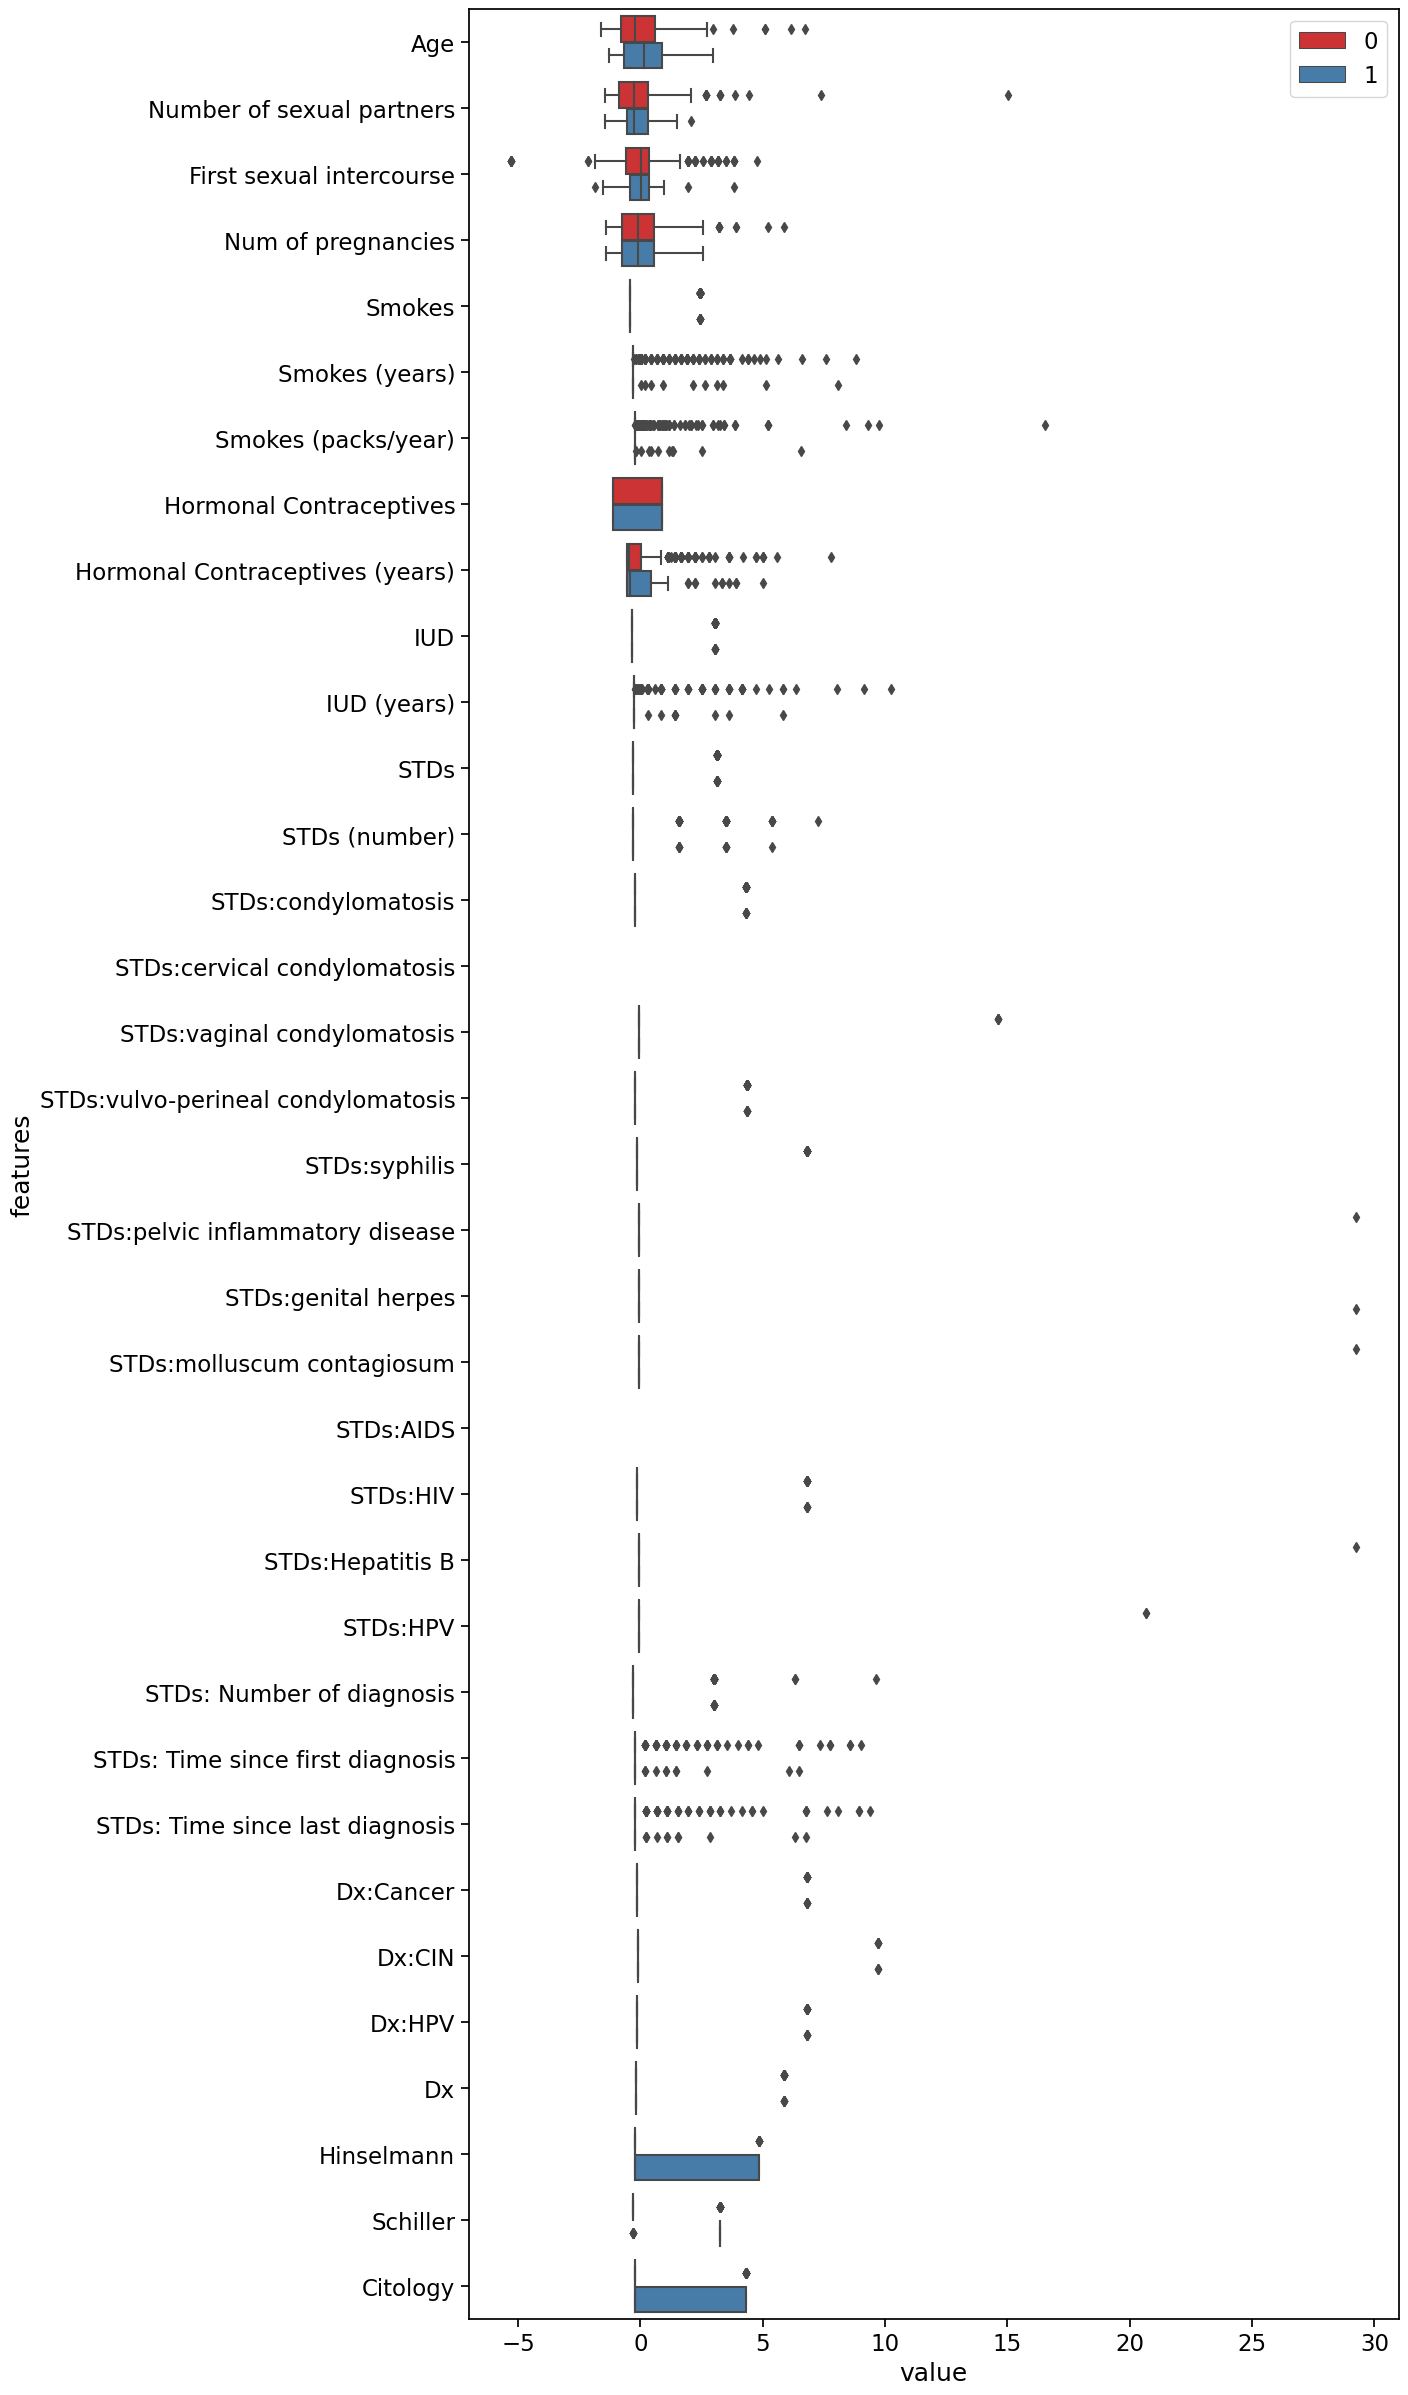

In [22]:
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="features", hue="Biopsy", data=data_st, palette='Set1')
plt.legend(loc='best');

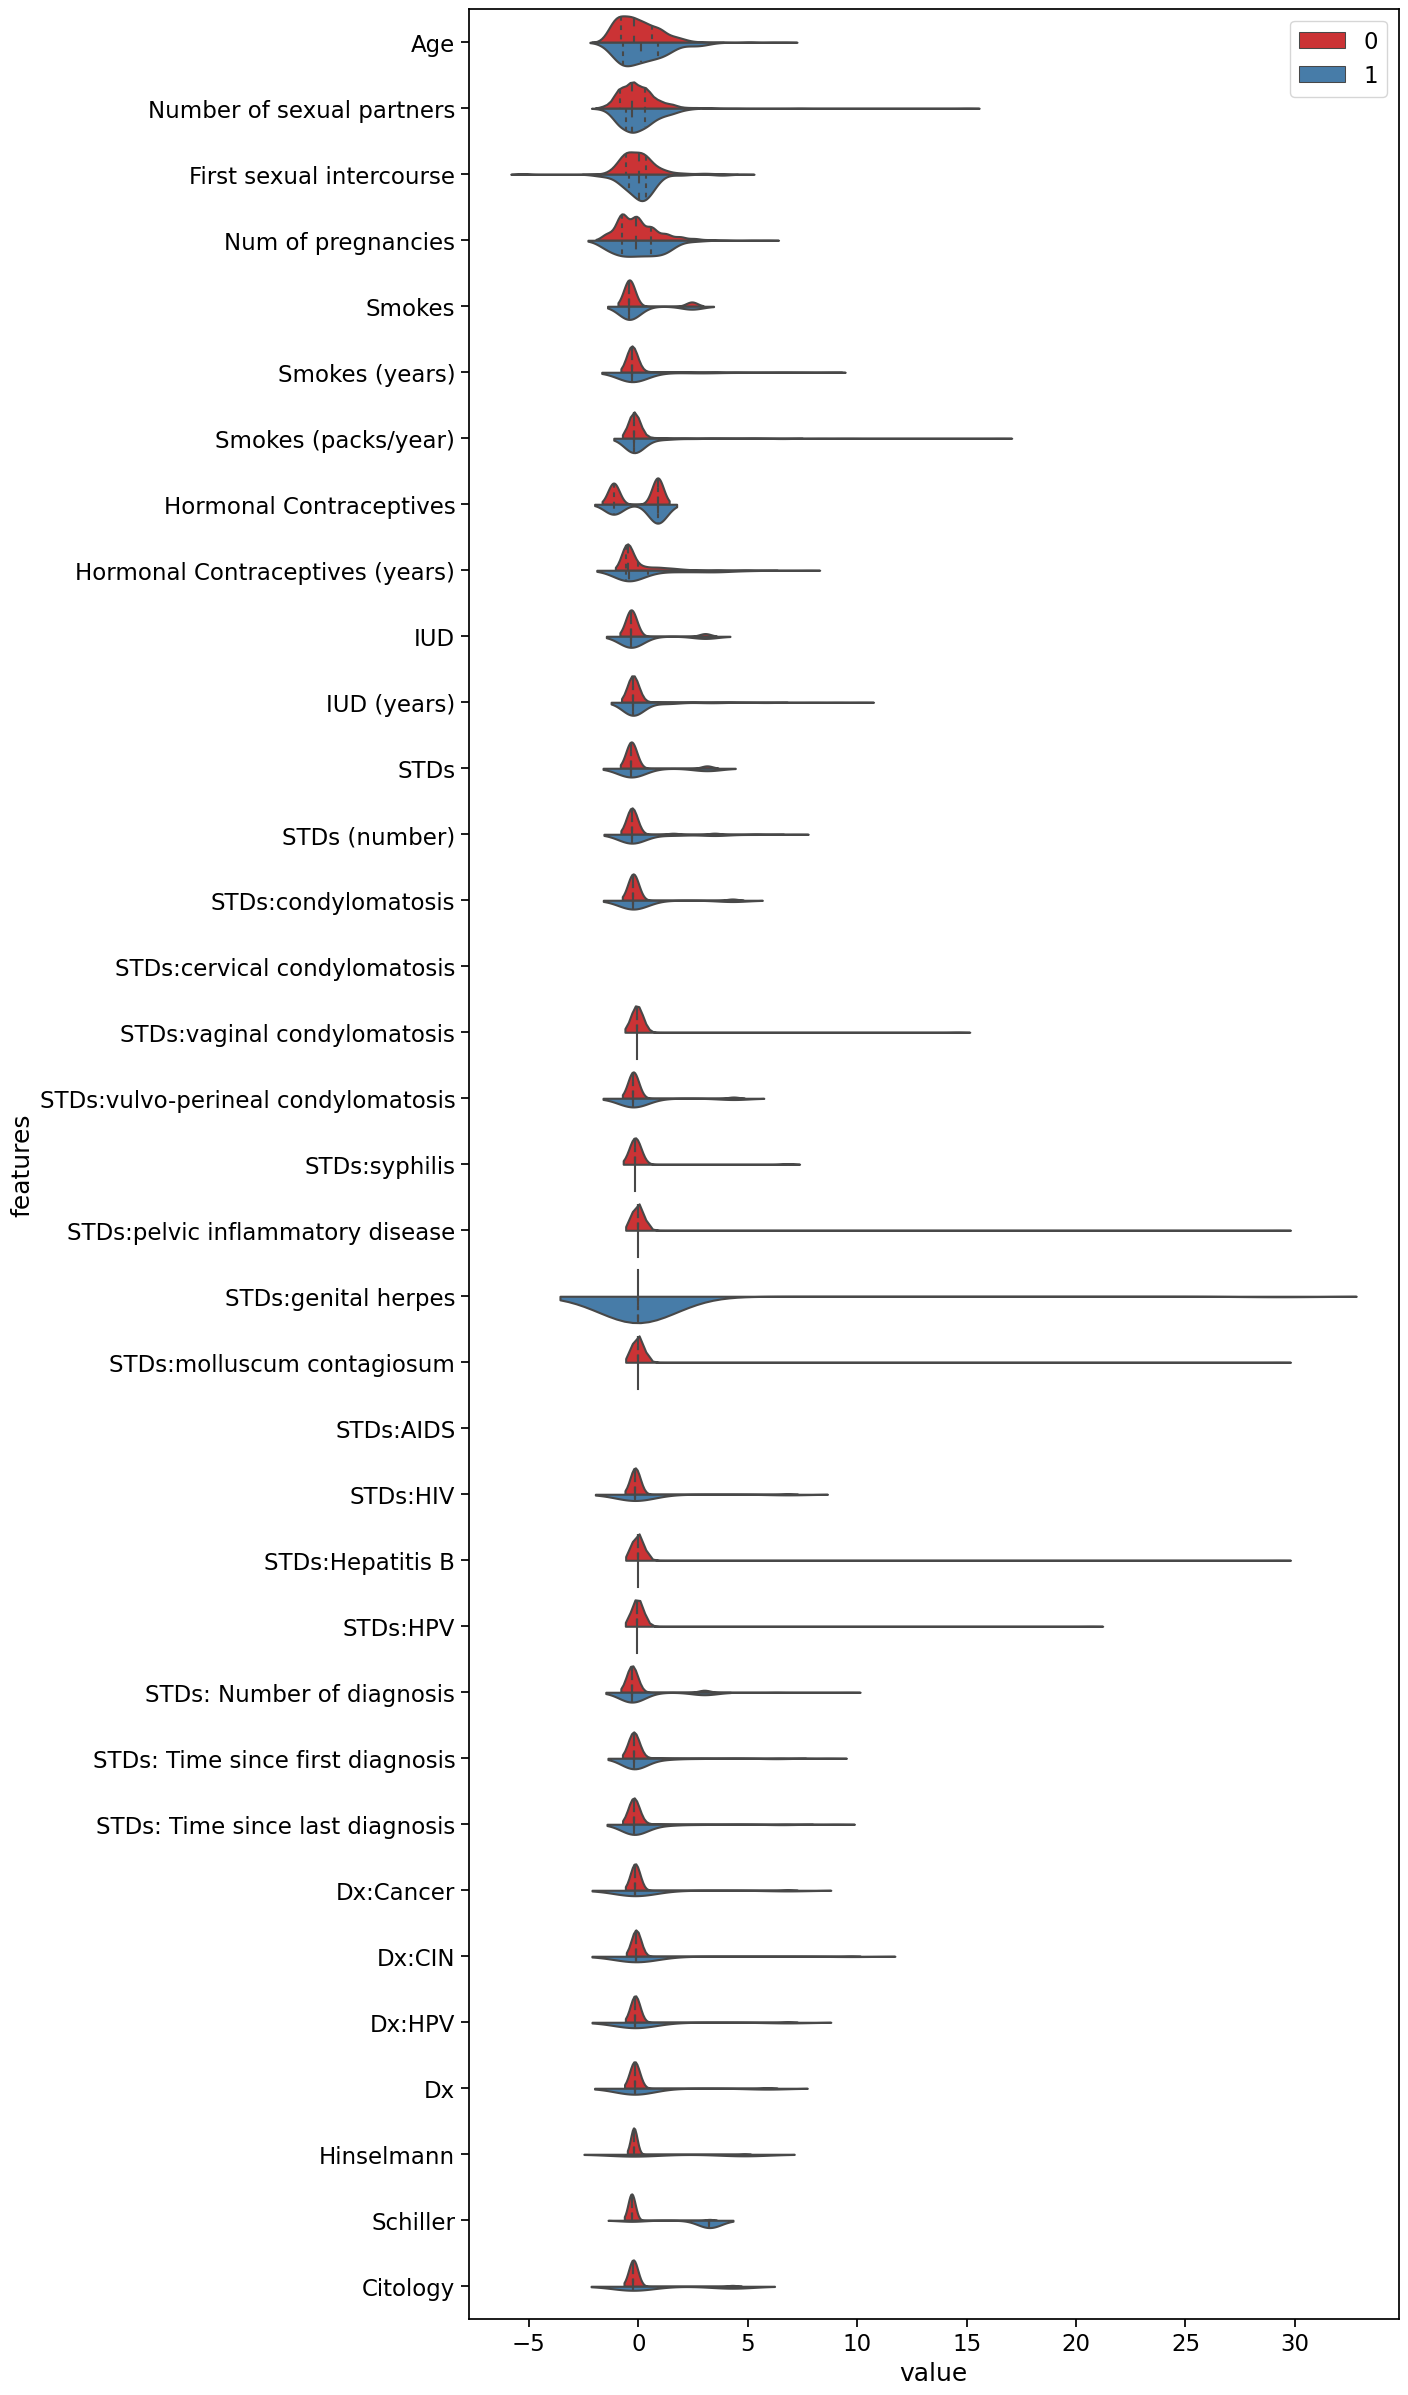

In [23]:
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.violinplot(x="value", y="features", hue="Biopsy", data=data_st,split=True,
               inner="quart", palette='Set1')
plt.legend(loc='best');

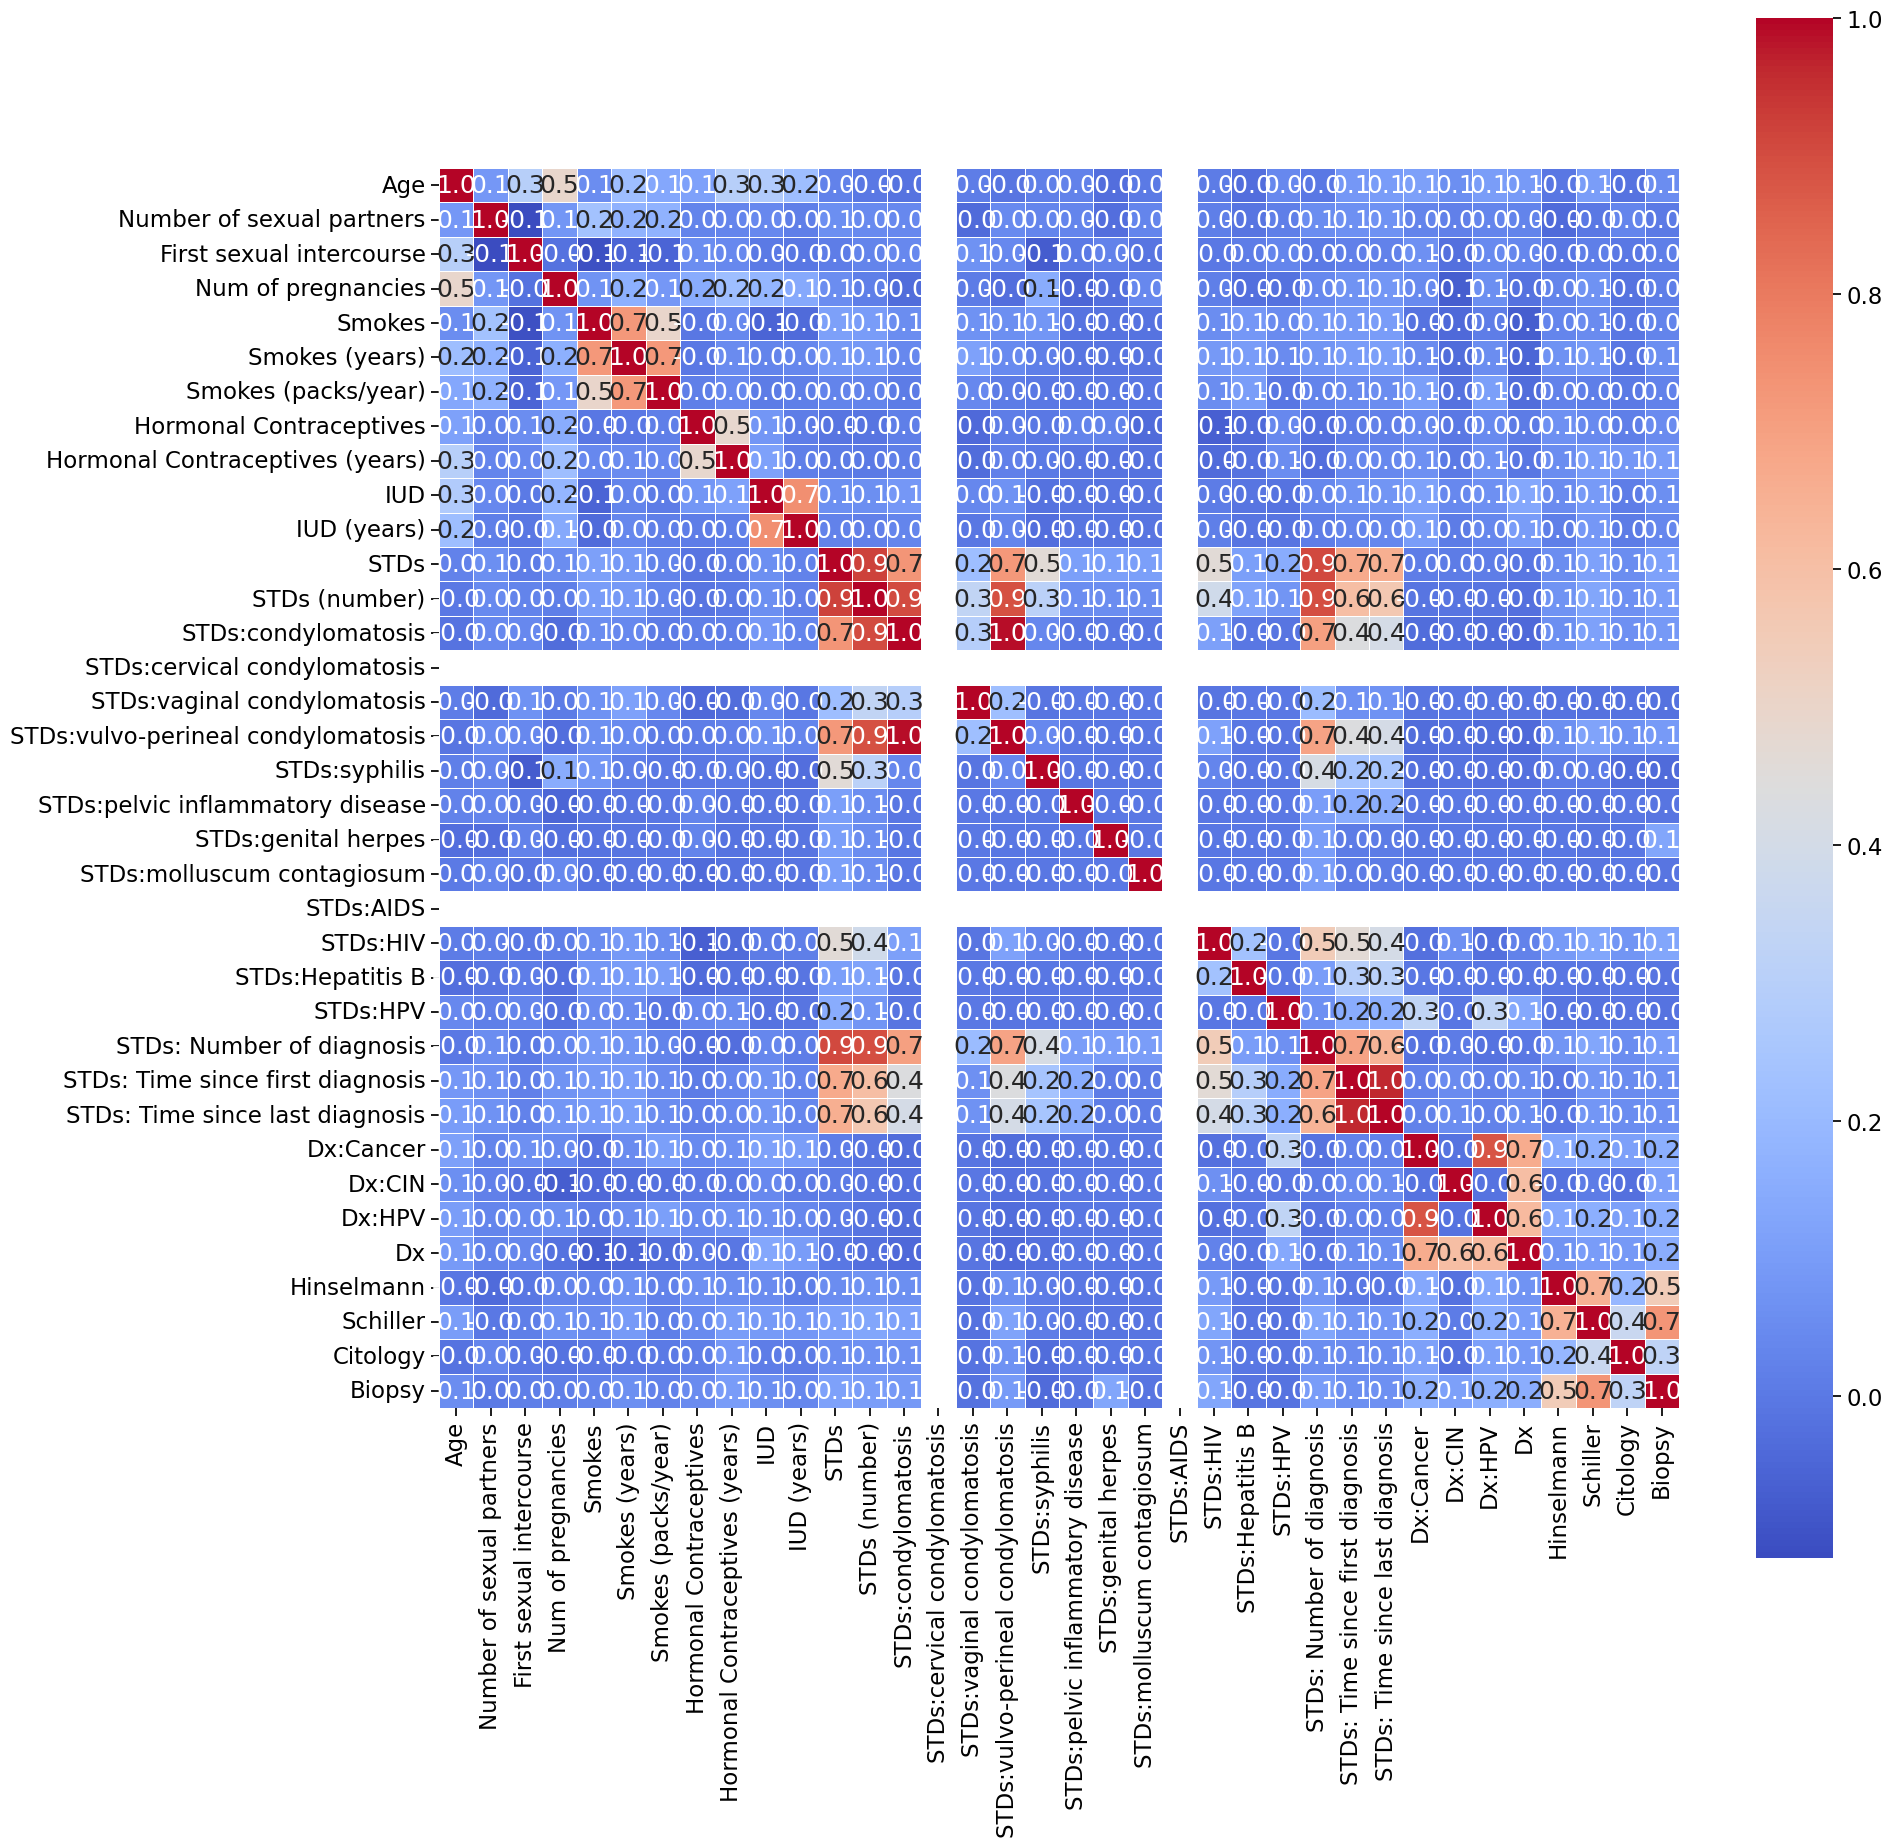

In [24]:
corr = data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f',
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax);

In [25]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [26]:
def pearson_r(x, y):
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for 'radius_mean', 'symmetry_mean'
r1 = pearson_r(data['Schiller'], data['Citology'])
r2= pearson_r(data['Schiller'], data['Citology'])

name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(data.iloc[:,1], data.iloc[:,j])
        if abs(r) >= 0.80 and data.columns[j]  not in name_c:
                    name_c.append(data.columns[j])
print()
print('* Lenght of columns assuming r >=0.80:', len(name_c))
print('name_c =',name_c)


* Lenght of columns assuming r >=0.80: 1
name_c = ['Number of sexual partners']


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [27]:
name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(data.iloc[:,1], data.iloc[:,j])
        if abs(r) <= 0.40 and data.columns[j]  not in name_c:
                    name_c.append(data.columns[j])

print('* Lenght of columns assuming r <=0.40:', len(name_c))
print('name_c =',name_c)


* Lenght of columns assuming r <=0.40: 27
name_c = ['First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV']


Uncorrelated data are poentially more useful: discrimentory!


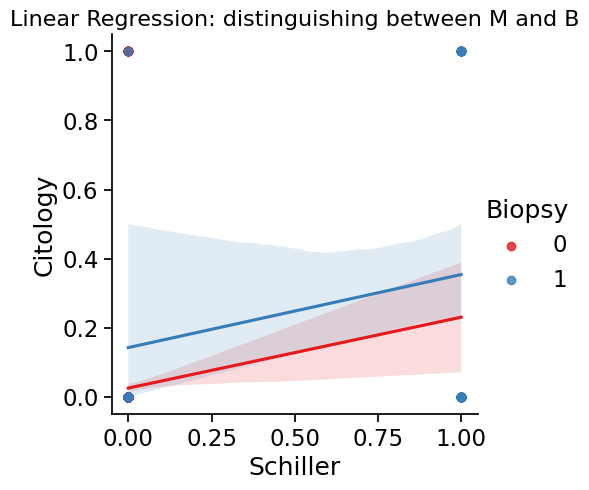

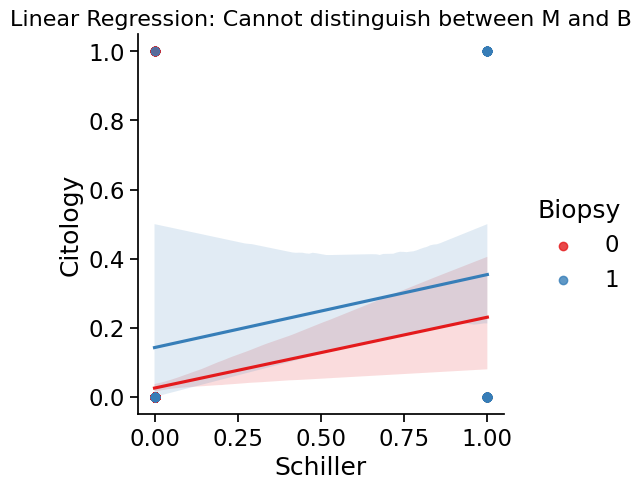

In [28]:
sns.lmplot(x='Schiller', y= 'Citology', data = data, hue ='Biopsy',
           palette='Set1')
plt.title('Linear Regression: distinguishing between M and B', size=16)


sns.lmplot(x='Schiller', y= 'Citology', data = data, hue ='Biopsy',
           palette='Set1')
plt.title('Linear Regression: Cannot distinguish between M and B', size=16);

print('Uncorrelated data are poentially more useful: discrimentory!')

In [29]:
# Let's map diagnosis column[object] to integer value:0, 1
# later on below I show how to use LabelEncoder(): it is better way to categorize
data=data.copy()
data['Biopsy']=data['Biopsy'].map({'M':1,'B':0})

In [30]:
data.dropna()
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,NaN
1,15,1,14,1,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,NaN
2,34,1,0,1,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,NaN
3,52,5,16,4,1,37.0,37.0,1,3.00,0,...,0,0,1,0,1,0,0,0,0,NaN
4,46,3,21,4,0,0.0,0.0,1,15.00,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,NaN
854,32,2,19,1,0,0.0,0.0,1,8.00,0,...,0,0,0,0,0,0,0,0,0,NaN
855,25,2,17,0,0,0.0,0.0,1,0.08,0,...,0,0,0,0,0,0,0,0,1,NaN
856,33,2,24,2,0,0.0,0.0,1,0.08,0,...,0,0,0,0,0,0,0,0,0,NaN
